<a href="https://colab.research.google.com/github/robin-mueller-aclue/ML-Training/blob/master/ML_Training__Demo_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries imporieren

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Datensatz importieren

In [ ]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


# Datensatz untersuchen

In [ ]:
print(f'Length \n  Train:{len(train_features)} \n  Test: {len(test_features)}\n')

print(f'Shape \n  Features: {train_features.shape} \n  Labels: {train_labels.shape}\n')

print(f'Samples \n  Feature: {train_features[0]} \n  Label: {train_labels[0]}\n')

Length 
  Train:404 
  Test: 102

Shape 
  Features: (404, 13) 
  Labels: (404,)

Samples 
  Feature: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 
  Label: 15.2



# Modell definieren

In [ ]:
model = keras.Sequential([
    layers.Dense(64, input_dim=13, activation='relu'),
    layers.Dense(1)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
None


# Modell kompilieren

In [ ]:
model.compile(loss=keras.losses.MeanAbsoluteError(),
              optimizer=keras.optimizers.Adam(0.001))

# Modell trainieren

In [ ]:
history = model.fit(train_features, train_labels, batch_size=32, validation_split=0.2, epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 40ms/step - loss: 14.8810 - val_loss: 12.4714
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 10.9836 - val_loss: 10.1352
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 8.6114 - val_loss: 7.9656
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 6.7223 - val_loss: 8.2588
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 6.5091 - val_loss: 6.8350
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 6.5249 - val_loss: 6.4459
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 6.4206 - val_loss: 6.1968
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 6.6585 - val_loss: 6.0537
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 5.6187 - val_loss: 5.9759
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 5.3468 - val_loss: 6.0999
Epoc

# Modell evaluieren

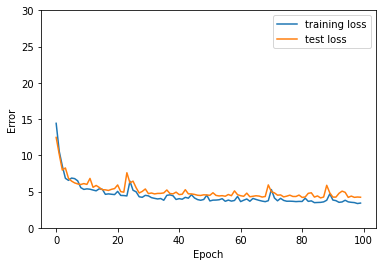

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0, 30])
plt.legend(loc='upper right')

# Vorhersagen treffen

In [ ]:
test_predictions = model.predict(test_features)

print(test_predictions.flatten())

# Vorhersagen evaluieren

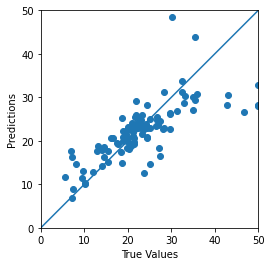

In [ ]:
plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()